In [2]:
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, linear_model, datasets
from sklearn.cross_validation import cross_val_score
from sklearn.pipeline import Pipeline
%matplotlib inline

# new dataset, handwritten digits!
digits = datasets.load_digits()


In [2]:

digits.data


array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [5]:
digits.data.shape

(1797L, 64L)

In [8]:

len(digits.data)      # 1,797 observations


1797

In [9]:

len(digits.data[0])   # 8 x 8 pixel image


64

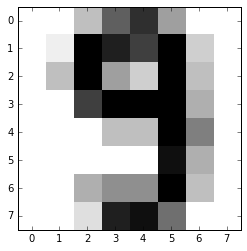

In [10]:

plt.imshow(digits.images[-5], cmap=plt.cm.gray_r, interpolation='nearest')
# the number 9


In [11]:

digits.target
len(digits.target)

digits.target[-5]
# 9


9

In [7]:
digits.target.shape

(1797L,)

In [13]:


digits_X, digits_y = digits.data, digits.target

# use an unsupervized artifical neural network to ascertain features


In [14]:

rbm = BernoulliRBM(random_state=0)
logistic = linear_model.LogisticRegression()
classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])
# I use a pipeline to do two things at once. Use the neural network to find features
# and use a logistic regression to classify


In [16]:

cross_val_score(classifier, digits_X, digits_y, cv=5, scoring='accuracy').mean()
# OOF! Not so great...


0.10183423001815592

In [17]:
# Ok but what if we just use logistic regression without getting new features?
logistic = linear_model.LogisticRegression()
cross_val_score(logistic, digits_X, digits_y, cv=5, scoring='accuracy').mean()
# OK not bad!!!


0.92101881133607011